In [2]:
from pm4py.objects.log.importer.xes import factory as xes_import_factory
from pm4py.algo.filtering.log.attributes import attributes_filter

In [30]:
#log = xes_import_factory.apply("data/DomesticDeclarations.xes")
log = xes_import_factory.apply("data/BPI_Challenge_2013_incidents.xes")
#log = xes_import_factory.apply("data/BPIC15_1.xes")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use importer entrypoint instead
  


In [31]:
log

[{'events': [{'time:timestamp': datetime.datetime(2010, 3, 31, 16, 59, 42, tzinfo=datetime.timezone(datetime.timedelta(0, 7200))), 'organization involved': 'Org line A2', 'organization country': 'fr', 'product': 'PROD582', 'concept:name': 'Accepted', 'impact': 'Medium', 'org:resource': 'Frederic', 'lifecycle:transition': 'In Progress', 'resource country': 'France', 'org:role': 'A2_4', 'org:group': 'V30'}, '..', {'time:timestamp': datetime.datetime(2012, 5, 11, 1, 26, 15, tzinfo=datetime.timezone(datetime.timedelta(0, 7200))), 'organization involved': 'Org line A2', 'organization country': 'fr', 'product': 'PROD582', 'concept:name': 'Completed', 'impact': 'Medium', 'org:resource': 'Siebel', 'lifecycle:transition': 'Closed', 'resource country': '0', 'org:role': 'A2_5', 'org:group': 'V5 3rd'}], 'attributes': {'concept:name': '1-364285768'}}, '....', {'events': [{'time:timestamp': datetime.datetime(2012, 5, 5, 14, 54, 27, tzinfo=datetime.timezone(datetime.timedelta(0, 7200))), 'organizatio

In [32]:
activities = attributes_filter.get_attribute_values(log, "concept:name")
#activities = attributes_filter.get_attribute_values(log, "activityNameEN")

In [33]:
activities

{'Accepted': 40117, 'Completed': 13867, 'Queued': 11544, 'Unmatched': 5}

## Alpha Miner

In [34]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  after removing the cwd from sys.path.


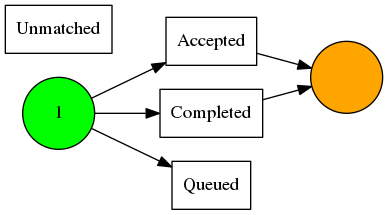

In [35]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz5 = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz5)

## Inductive Miner

In [36]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net1, initial_marking1, final_marking1 = inductive_miner.apply(log)

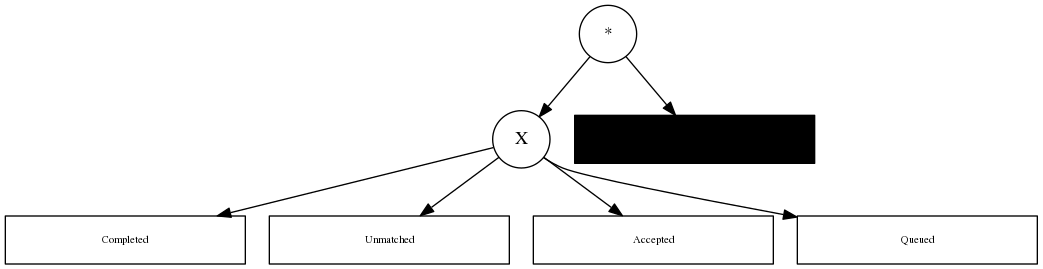

In [37]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(log)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

## Heuristic Miner

In [38]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

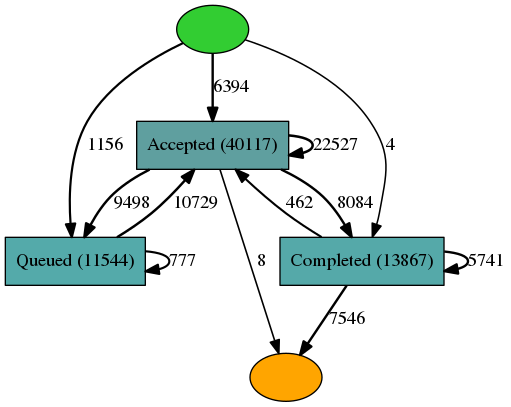

In [39]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz2 = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz2)

## Directly-Follows Graph

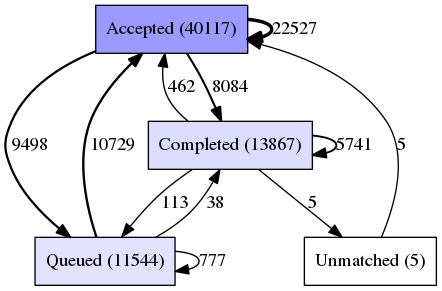

In [40]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(log)

from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz3 = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz3)

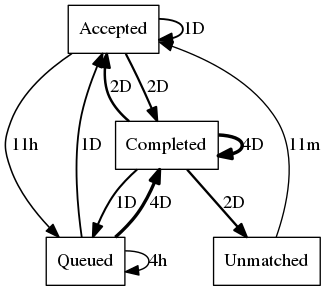

In [41]:
dfg2 = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz4 = dfg_visualization.apply(dfg2, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz4)